# GIS routing

All the algorithms presented so far are almost what you are going to need if you want to create your routing system and the big names in the field like Google and Apple and Microsoft are using modified versions of these algorithms because they have a lot of data and huge infrastructure so they could tune their heuristic to give impressive preformance.  


There is a highly-cited survey on all of these methods and more and how they are used in the industry at [Route Planning in Transportation Networks](https://arxiv.org/pdf/1504.05140.pdf). The authors of that survey are pretty much the creators of that field and most of these algorithms, so stalking them will really help you in this course.

---

We decided to make this notebook to only show you animation of the algorithms and the trend of expansion for each one. We didn't provide the animation in the algorithms notebooks because we didn't want to smear the code with animations utilities and here you can scroll up and down and see the difference in the same notebook and we would also use a bigger map.

---

As we are animating the algorithm on a big graph with >1000 nodes and loops and not straight edges, you won't be able to trace the algorithm iterations but our hope is that you see the overall pattern of expansion for all the nodes.

# Getting the map

In [2]:
import osmnx as ox
import time
from tqdm import tqdm
from collections import deque
from IPython.display import HTML
from utilities import *

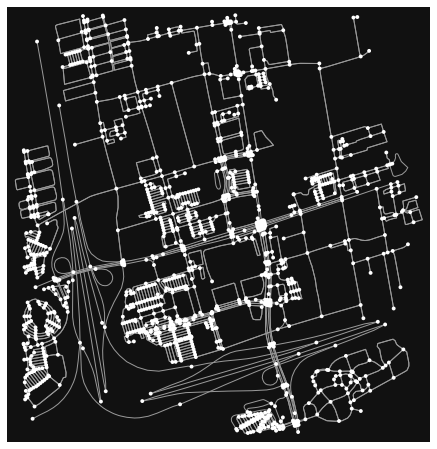

In [3]:
G = ox.graph_from_address('vaughan', dist= 1400)
fig, ax = ox.plot_graph(G)

let's find two arbitrary vertices to be our source and destination

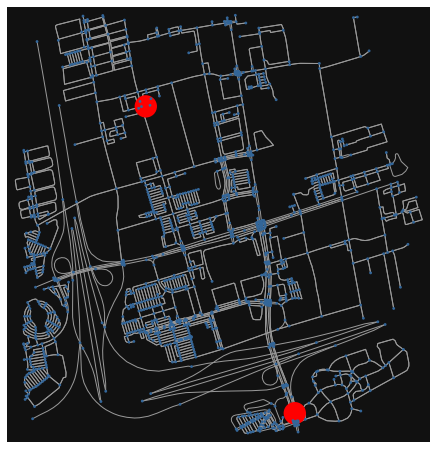

In [4]:
highlighted = [29658954, 7450058649]

nc = ['r' if node in highlighted else '#336699' for node in G.nodes()]
ns = [500 if node in highlighted else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

Let's make our usual set up

In [5]:
origin = Node(graph = G, osmid = 29658954)
destination = Node(graph = G, osmid = 7450058649)

### Breadth First Search
please note `colors` array which serves as stamp for the current state of the traversing and expansion of the nodes, otherwise it is the same algorithm.

In [5]:
%%time
bar = tqdm(total=len(G))
colors = []

route = []
frontier = deque([origin])
explored = set()

found = False

while frontier and not found:
    bar.update(1); # time.sleep(0.05) # for the progress bar -- ignore
    node = frontier.popleft()
    explored.add(node)
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route = child.path()
                found = True
                
                state_color = [1 if node in route else 6 for node in G.nodes()]
                colors.extend([*[*([state_color]*50)]]) # all that packing/unpacking to extend the period
                                                        # in the video 
                
            frontier.append(child)

    state_color = [1 if node in explored else 6 for node in G.nodes()]
    colors.append(state_color)
    
bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n", cost(G, route))

 69%|██████▉   | 916/1330 [00:00<00:00, 3198.03it/s]

The route is 

 [29658954, 701446580, 701446835, 391892572, 2808642993, 2808642992, 3918922979, 7241520823, 5298057161, 701447100, 382741474, 701446646, 4933260585, 701446801, 4931701390, 701446500, 701446614, 4359477382, 701446929, 701446958, 4359471925, 7143191824, 34290892, 4555563325, 701446536, 7226985204, 7226985205, 7226985208, 7321414078, 7450058643, 7450058649] 

its cost is

 3440.0470000000005
CPU times: user 288 ms, sys: 3.99 ms, total: 292 ms
Wall time: 289 ms


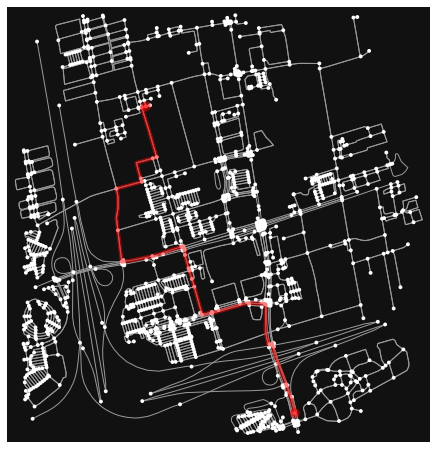

In [6]:
fig, ax = ox.plot_graph_route(G, route)

Focus on how breadth first search traverse on the graph and how it expands on all directions and waste time

In [7]:
%%capture
ani = animate_simple(G, colors, speed = 100)

In [8]:
# this would take some time (2-3 mins) to be rendered
HTML(ani.to_html5_video())

### Depth First Search

In [9]:
%%time
bar = tqdm(total=len(G))
colors = []

route = []
frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    bar.update(1); # time.sleep(0.05)
    node = frontier.pop()
    explored.add(node)
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route  = child.path()
                found = True
                
                state_color = [1 if node in route else 6 for node in G.nodes()]
                colors.extend([*[*([state_color]*50)]])
                
                continue
            frontier.append(child)
    state_color = [1 if node in explored else 6 for node in G.nodes()]
    colors.append(state_color)

bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n", cost(G, route))

 47%|████▋     | 630/1330 [00:00<00:00, 3408.67it/s]

The route is 

 [29658954, 701446580, 701446835, 391892572, 2808642993, 3293791876, 3293791877, 3918922979, 7241520823, 5298057161, 3918913916, 3918914361, 3918913913, 5298056851, 3918913912, 3918913949, 3918913910, 5298062478, 3918913909, 3918913935, 3918913906, 5298050256, 3918900888, 4572038773, 4572038774, 4572038775, 701446511, 3891155944, 3891155941, 3891155932, 3891155931, 3891155929, 3891155940, 3891155938, 3891155937, 3891155945, 3891155951, 3891156058, 3891156059, 3891156060, 4572038772, 4572038770, 4572038760, 4572038748, 4572038745, 4572038742, 4572038762, 701446888, 701446820, 4572047311, 4348121705, 3918923003, 4348121701, 7711747807, 7711747806, 701446646, 4933260585, 701446801, 4931701390, 701446500, 701446614, 7897433581, 7897433578, 3771862212, 7426780312, 7426780311, 7426780310, 7426780309, 7426780307, 5997597209, 5997597208, 701446470, 6852786175, 701446545, 701446588, 7545435594, 7545435593, 7545435604, 2068725726, 701446805, 7232202174, 7232202172, 7232202175, 425

In [10]:
%%capture
ani = animate_simple(G, colors, speed = 100)

In [11]:
# this would take some time (2-3 mins) to be rendered
HTML(ani.to_html5_video())

## A star search

In [13]:
toGoal, toDestination = astar_heuristic(G, origin.osmid, destination.osmid)

In [15]:
%%time
route = []
frontier = list()

bar = tqdm(total=len(G)) # for the progress bar
colors = []

frontier.append(origin)
explored = set()
found = False

while frontier and not found:
    bar.update(1);# time.sleep(0.05)
    
    # choose a node based on its heuristic value
    node = min(frontier, key = lambda node : toGoal[node.osmid] + toDestination[node.osmid])
    frontier.remove(node)
    explored.add(node)
    
    # expand its children
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route = child.path()
                found = True
                
                state_color = [1 if node in route else 6 for node in G.nodes()]
                colors.extend([*[*([state_color]*50)]])
                
                continue
            frontier.append(child)
    
    state_color = [1 if node in explored else 6 for node in G.nodes()]
    colors.append(state_color)

bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n", cost(G, route))


 14%|█▍        | 188/1330 [00:00<00:00, 4565.39it/s]

The route is 

 [29658954, 701446580, 701446835, 391892572, 2808642993, 2808642992, 3918922979, 7241520823, 7241520822, 4590790113, 7241520854, 7241520839, 701447100, 382741474, 701446646, 4933260585, 701446801, 4931701390, 701446500, 701446614, 7897433581, 7897433578, 7897438085, 701446895, 7897433580, 2052121378, 2052121381, 2052121384, 2052121386, 2052121389, 2052121392, 1748830950, 4933245695, 4505168711, 4933245700, 4933245705, 4933245707, 4933245703, 1748832014, 1748832073, 1748832099, 1748832094, 1748832091, 1748832090, 1748832136, 6852786184, 6852786183, 701446463, 7226985214, 7321414078, 7450058643, 7450058649] 

its cost is

 3627.5070000000014
CPU times: user 47.4 ms, sys: 0 ns, total: 47.4 ms
Wall time: 45.4 ms



  6%|▌         | 83/1330 [00:19<01:05, 19.13it/s]

In [16]:
%%capture
ani = animate_simple(G, colors, speed = 100)

In [17]:
# this would take some time (2-3 mins) to be rendered
HTML(ani.to_html5_video())

## Dijkstra Search

In [20]:
%%time
bar = tqdm(total = len(G))

colors = []

seen = set()         # for dealing with self loops

shortest_dist = {osmid: math.inf for osmid in G.nodes()}
unrelaxed_nodes = [Node(graph = G, osmid = osmid) for osmid in G.nodes()]

shortest_dist[origin.osmid] = 0
found = False

while len(unrelaxed_nodes) > 0 and not found:
    bar.update(1); # time.sleep(0.05)
    
    node = min(unrelaxed_nodes, key = lambda node : shortest_dist[node.osmid])
    
    unrelaxed_nodes.remove(node)
    seen.add(node.osmid)
        
    if node == destination:
        route = node.path()
        cost = shortest_dist[node.osmid]
        found = True
        
        state_color = [1 if node in route else 6 for node in G.nodes()]
        colors.extend([*[*([state_color]*50)]])
        
        continue

    for child in node.expand():

        if child.osmid in seen: continue
        
        child_obj = next((node for node in unrelaxed_nodes if node.osmid == child.osmid), None)
        child_obj.distance = child.distance
        
        distance = shortest_dist[node.osmid] + child.distance
        if distance < shortest_dist[child_obj.osmid]:
            shortest_dist[child_obj.osmid] = distance
            child_obj.parent = node
    
    state_color = [1 if node in seen else 6 for node in G.nodes()]
    colors.append(state_color)
bar.close()
print(f"The route is \n\n{route} \n\nits cost is\n\n{cost}")


 73%|███████▎  | 965/1330 [00:00<00:00, 2696.00it/s]

The route is 

[29658954, 701446580, 701446835, 391892572, 2808642993, 3293791876, 3293791877, 3918922979, 7241520823, 5298057161, 701447100, 382741474, 701446646, 4933260585, 701446801, 4931701390, 701446500, 701446614, 4359477382, 701446929, 701446777, 7515524075, 7515524074, 1748829734, 391917373, 701446879, 1748832132, 701446463, 7226985214, 7321414078, 7450058643, 7450058649] 

its cost is

2685.3950000000004
CPU times: user 361 ms, sys: 3.96 ms, total: 365 ms
Wall time: 361 ms


In [21]:
%%capture
ani = animate_simple(G, colors, speed = 100)

In [22]:
HTML(ani.to_html5_video())

## Bi-directional BFS

In [6]:
origin_b = destination
destination_b = origin

In [10]:
%run
route = []

# uncomment the following line to see the progress bar

bar = tqdm(total=len(G))

frontier_f = deque([origin])
frontier_b = deque([origin_b])

explored_f = list()
explored_b = list()

collide = False
found = False
altr_exapnd = False # to alternate between front and back

while frontier_f and frontier_b and not collide and not found:
    bar.update(1); # time.sleep(0.05)
    
    if altr_exapnd:
        # remove node_f from frontier_f to expand it
        node = frontier_f.popleft()
        explored_f.append(node)
        
        # if we expanded the destination -- we have our route
        # if we expanded a node that were expanded from the other expansion
        # nodes have overlapped and we stitch the route from origin
        # to that node and the route from that node to destination
        for child in node.expand():
            if child in explored_f: continue
            
            if child == destination:
                route = child.path()
                found = True
                break

            # checking the explored_f to stitch the node we the overlapped one
            # stitched front route to back route
            if child in explored_b:
                overlapped = next((node for node in explored_b if node == child))
                # we don't take the overlapped node twice
                route = child.path()[:-1] + overlapped.path()[::-1]
                collide = True
                break

            frontier_f.append(child)
        altr_exapnd = False
    else:
        # remove node_b from frontier_b to expand it
        node = frontier_b.popleft()
        explored_b.append(node)
        
        for child in node.expand():
            if child in explored_b: continue
            if child == destination_b:
                route = child.path()[::-1] # we reverse the list because we expand from the back
                found = True
                break

            if child in explored_f:
                overlapped = next((node for node in explored_f if node == child), None)
                route = overlapped.path()[:-1] + child.path()[::-1]
                collide = True
                break

            frontier_b.append(child)
        altr_exapnd = True


bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n")




  0%|          | 0/1330 [00:00<?, ?it/s]


 56%|█████▌    | 741/1330 [00:00<00:00, 7408.56it/s]


%run:
 Run the named file inside IPython as a program.

Usage::

  %run [-n -i -e -G]
       [( -t [-N<N>] | -d [-b<N>] | -p [profile options] )]
       ( -m mod | file ) [args]

Parameters after the filename are passed as command-line arguments to
the program (put in sys.argv). Then, control returns to IPython's
prompt.

This is similar to running at a system prompt ``python file args``,
but with the advantage of giving you IPython's tracebacks, and of
loading all variables into your interactive namespace for further use
(unless -p is used, see below).

The file is executed in a namespace initially consisting only of
``__name__=='__main__'`` and sys.argv constructed as indicated. It thus
sees its environment as if it were being run as a stand-alone program
(except for sharing global objects such as previously imported
modules). But after execution, the IPython interactive namespace gets
updated with all variables defined in the program (except for __name__
and sys.argv). This allows 




 81%|████████▏ | 1083/1330 [00:00<00:00, 5480.88it/s]


1360it [00:00, 4232.59it/s]                          


1624it [00:00, 3413.00it/s]


1879it [00:00, 2966.78it/s]


2126it [00:00, 2477.14it/s]


2423it [00:00, 2734.54it/s]

The route is 

 [29658954, 701446580, 701446835, 391892572, 2808642993, 2808642992, 3918922979, 7241520823, 5298057161, 701447100, 382741474, 701446646, 4933260585, 701446801, 4931701390, 701446500, 701446614, 4359477382, 5997588696, 701446958, 4935676612, 701446777, 7515524075, 7515524074, 1748829734, 391917373, 701446879, 1748832132, 701446463, 7226985214, 7321414078, 7450058643, 7450058649] 

its cost is




In [11]:
route

[29658954,
 701446580,
 701446835,
 391892572,
 2808642993,
 2808642992,
 3918922979,
 7241520823,
 5298057161,
 701447100,
 382741474,
 701446646,
 4933260585,
 701446801,
 4931701390,
 701446500,
 701446614,
 4359477382,
 5997588696,
 701446958,
 4935676612,
 701446777,
 7515524075,
 7515524074,
 1748829734,
 391917373,
 701446879,
 1748832132,
 701446463,
 7226985214,
 7321414078,
 7450058643,
 7450058649]

In [12]:
one_way_route(G, route)

TypeError: can only assign an iterable